In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

np.random.seed(123)

In [ ]:
realisation_1 = np.random.normal(10, 1, 1000)
realisation_2 = np.random.normal(10, 4, 15000)
realisation_3 = np.random.normal(10, 5, 15000)
realisation = np.concatenate((np.concatenate((realisation_1, realisation_2)), realisation_3))

In [ ]:
def fonction_1(realisation, memory_window, gammas):
    colors = ["b", "r", "g", "c", "m", "k", "y"]
    infos = [[0, 0, 0] for _ in range(len(gammas))]
    vars_res = [[] for _ in range(len(gammas))]
    legend = ["$\gamma=$"+str(gammas[i]) for i in range(len(gammas))]

    for x in realisation:
        for i in range(len(gammas)):
            infos[i][0], infos[i][1], infos[i][2] = weighted_variance(infos[i][0], infos[i][1], infos[i][2], x, memory_window, gammas[i])
            vars_res[i].append(infos[i][0])

    plt.figure(figsize=(14,7))
    for i in range(len(vars_res)):
        plt.plot(range(1, len(realisation)+1), vars_res[i], colors[i])

    plt.axhline(y=1, color='red', linestyle='--')
    plt.axhline(y=16, color='red', linestyle='--')
    plt.axhline(y=25, color='red', linestyle='--')
    plt.legend(legend, loc ="upper left")
    plt.ylabel("Variances")
    plt.xlabel("Iterations")
    plt.show()

def fonction_2(realisation, memory_windows, gamma):
    colors = ["b", "r", "g", "c", "m", "k", "y"]
    infos = [[0, 0, 0] for _ in range(len(memory_windows))]
    vars_res = [[] for _ in range(len(memory_windows))]
    legend = ["$W=$"+str(memory_windows[i]) for i in range(len(memory_windows))]

    for x in realisation:
        for i in range(len(memory_windows)):
            infos[i][0], infos[i][1], infos[i][2] = weighted_variance(infos[i][0], infos[i][1], infos[i][2], x, memory_windows[i], gamma)
            vars_res[i].append(infos[i][0])

    plt.figure(figsize=(14,7))
    for i in range(len(vars_res)):
        plt.plot(range(1, len(realisation)+1), vars_res[i], colors[i])

    plt.axhline(y=1, color='red', linestyle='--')
    plt.axhline(y=16, color='red', linestyle='--')
    plt.axhline(y=25, color='red', linestyle='--')
    plt.legend(legend, loc ="upper left")
    plt.ylabel("Variances")
    plt.xlabel("Iterations")
    plt.show()

def weighted_variance(var, moy, n, x_new, memory_window, gamma):
    if n>memory_window:
        a = gamma*(var+(moy**2)) + (1-gamma)*(x_new**2)
        moy = gamma * moy + (1-gamma) * x_new
    else:
        a = (n*(var+(moy**2)) + (x_new**2))/(n+1)
        moy = (n*moy+x_new)/(n+1)
    return a-moy**2, moy, n+1

def weighted_covariance(n, moy_prod, moy_x, moy_y, x_new, y_new, memory_window, gamma):
    if n>memory_window:
        return n + 1, gamma * moy_prod + (1-gamma) * x_new * y_new, gamma * moy_x + (1-gamma) * x_new, gamma * moy_y + (1-gamma) * y_new
    return n + 1, (n * moy_prod + x_new * y_new)/(n + 1), (n * moy_x + x_new)/(n + 1), (n * moy_y + y_new)/(n + 1)

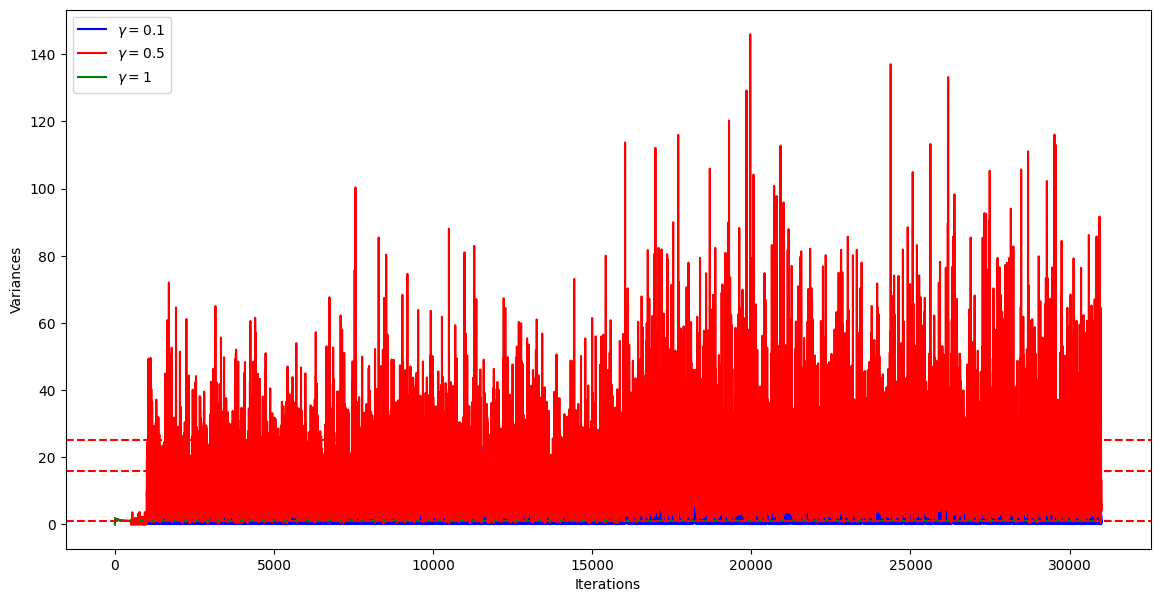

In [ ]:
fonction_1(realisation, memory_window=500, gammas=[0.1, 0.5, 1])

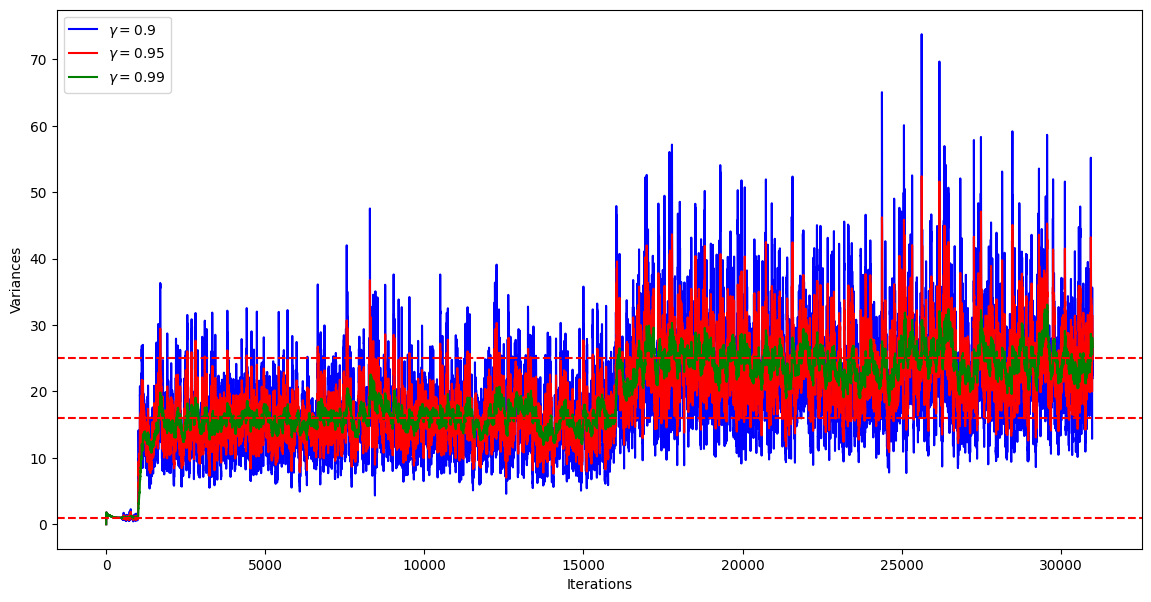

In [ ]:
fonction_1(realisation, memory_window=500, gammas=[0.9, 0.95, 0.99])

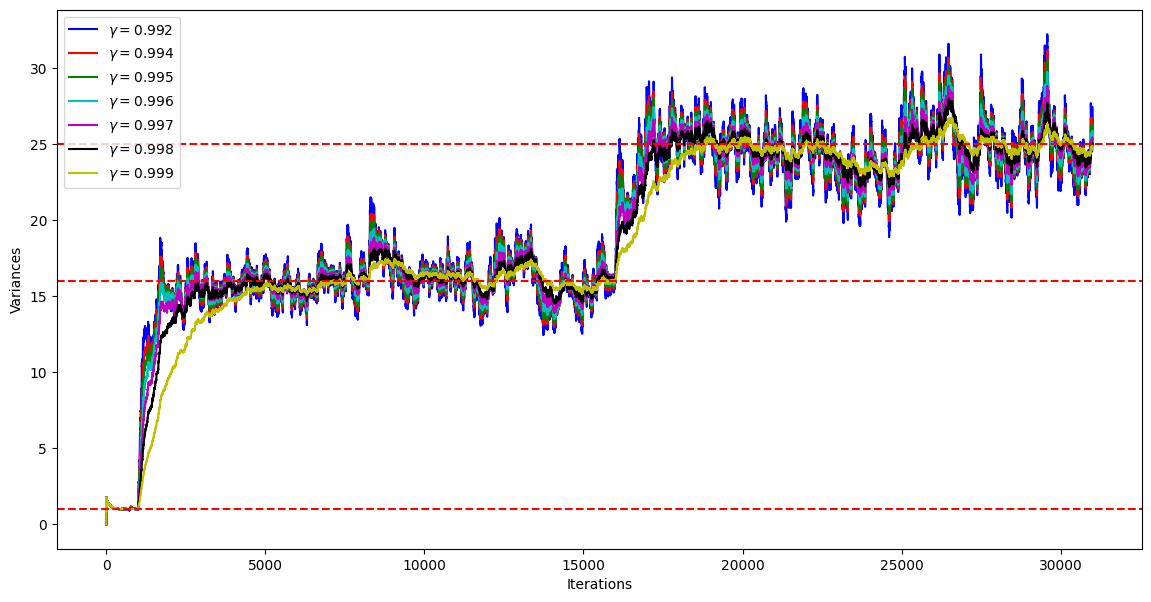

In [ ]:
fonction_1(realisation, memory_window=500, gammas=[0.992, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999])

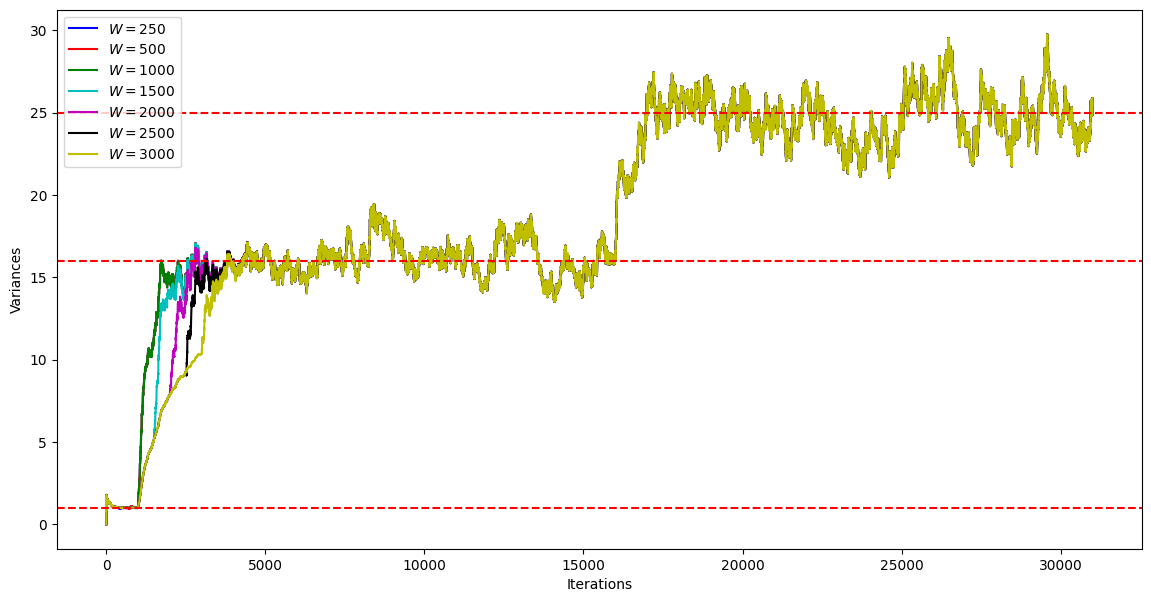

In [ ]:
fonction_2(realisation, memory_windows=[250, 500, 1000, 1500, 2000, 2500, 3000], gamma=0.996)

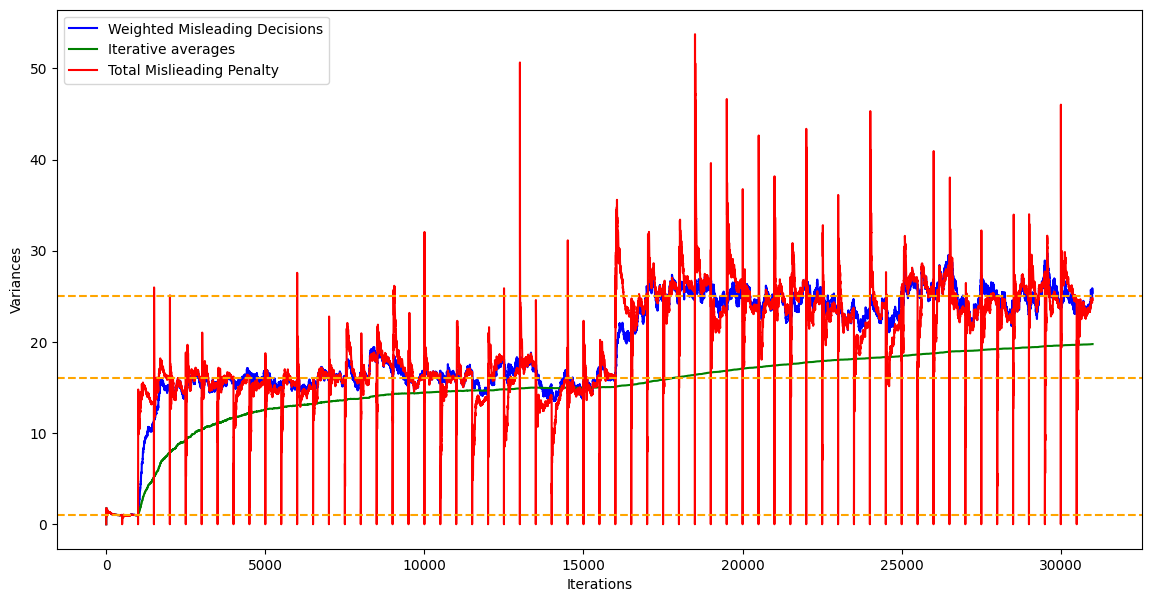

In [ ]:
var1, moy1, n1 = 0, 0, 0
var2, moy2, n2 = 0, 0, 0
var3, moy3, n3 = 0, 0, 0
vars1, vars2, vars3 = [], [], []

for i in range(len(realisation)):
    var1, moy1, n1 = weighted_variance(var1, moy1, n1, realisation[i], 500, 0.996)
    vars1.append(var1)

    var2, moy2, n2 = weighted_variance(var2, moy2, n2, realisation[i], float("inf"), 0)
    vars2.append(var2)

    if i%500==0:
        var3, moy3, n3 = 0, 0, 0
    var3, moy3, n3 = weighted_variance(var3, moy3, n3, realisation[i], float("inf"), 0)
    vars3.append(var3)

plt.figure(figsize=(14,7))
plt.plot(range(1, len(realisation)+1), vars1, "b")
plt.plot(range(1, len(realisation)+1), vars2, "g")
plt.plot(range(1, len(realisation)+1), vars3, "r")
plt.axhline(y=1, color='orange', linestyle='--')
plt.axhline(y=16, color='orange', linestyle='--')
plt.axhline(y=25, color='orange', linestyle='--')
plt.legend(["Weighted Misleading Decisions", "Iterative averages", "Total Mislieading Penalty"], loc ="upper left")
plt.ylabel("Variances")
plt.xlabel("Iterations")
plt.show()

In [ ]:
realisation_1 = np.random.multivariate_normal(np.array([10, 6]), np.array([[10, 5], [5, 10]]), 50000)
realisation_2 = np.random.multivariate_normal(np.array([10, 6]), np.array([[10, 8], [8, 10]]), 200000)
realisation = np.concatenate((realisation_1, realisation_2))
realisation_x_1, realisation_x_2 = realisation[:,0], realisation[:,1]

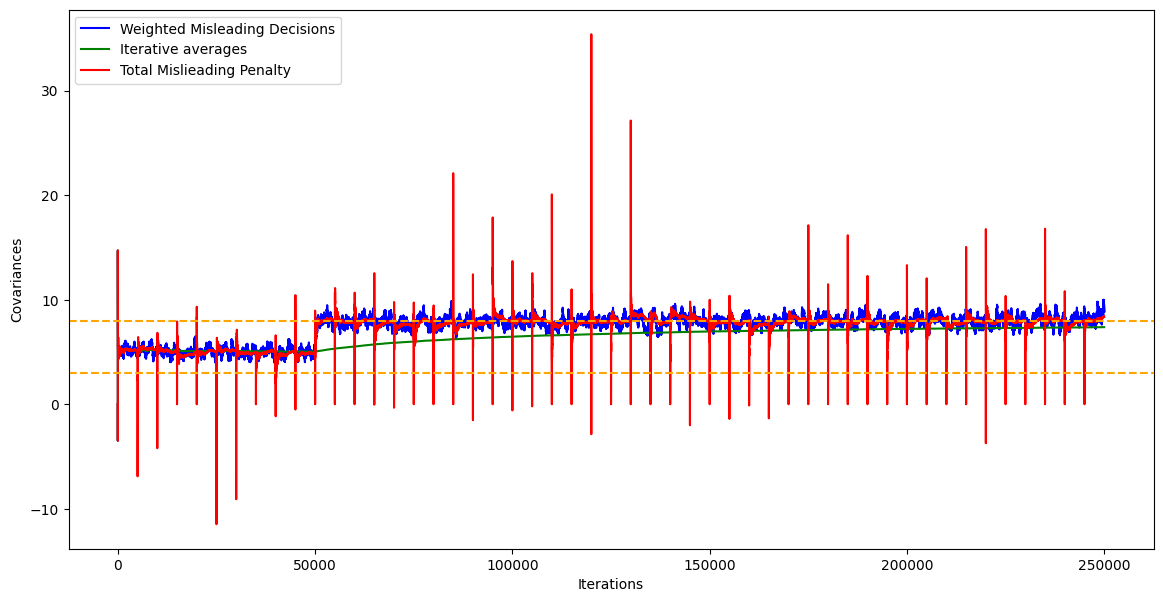

In [ ]:
n1, moy_prod1, moy_x1, moy_y1 = 0, 0, 0, 0
n2, moy_prod2, moy_x2, moy_y2 = 0, 0, 0, 0
n3, moy_prod3, moy_x3, moy_y3 = 0, 0, 0, 0
cov1, cov2, cov3 = [], [], []

for i in range(len(realisation)):
    n1, moy_prod1, moy_x1, moy_y1 = weighted_covariance(n1, moy_prod1, moy_x1, moy_y1, realisation_x_1[i], realisation_x_2[i], 500, 0.997)
    cov1.append(moy_prod1-moy_x1*moy_y1)

    n2, moy_prod2, moy_x2, moy_y2 = weighted_covariance(n2, moy_prod2, moy_x2, moy_y2, realisation_x_1[i], realisation_x_2[i], float("inf"), 0)
    cov2.append(moy_prod2-moy_x2*moy_y2)

    if i%5000==0:
        n3, moy_prod3, moy_x3, moy_y3 = 0, 0, 0, 0
    n3, moy_prod3, moy_x3, moy_y3 = weighted_covariance(n3, moy_prod3, moy_x3, moy_y3, realisation_x_1[i], realisation_x_2[i], float("inf"), 0)
    cov3.append(moy_prod3-moy_x3*moy_y3)

plt.figure(figsize=(14,7))
plt.plot(range(1, len(realisation)+1), cov1, "b")
plt.plot(range(1, len(realisation)+1), cov2, "g")
plt.plot(range(1, len(realisation)+1), cov3, "r")
plt.axhline(y=3, color='orange', linestyle='--')
plt.axhline(y=8, color='orange', linestyle='--')
plt.legend(["Weighted Misleading Decisions", "Iterative averages", "Total Mislieading Penalty"], loc ="upper left")
plt.ylabel("Covariances")
plt.xlabel("Iterations")
plt.show()